<a href="https://colab.research.google.com/github/vinayshanbhag/covid19/blob/master/covid_19_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Load Data {display-mode: "form"}
#@markdown > Source https://covid.ourworldindata.org/data/ecdc/full_data.csv 

# This code will be hidden when the notebook is loaded.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from datetime import datetime, timedelta

owid_url = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"
df_all = pd.read_csv(owid_url)
df_all["date"] = pd.to_datetime(df_all.date)
countries = ["India","United States","Italy","Spain","Germany", "France","United Kingdom"]#['India','Poland','Denmark','Chile','Czech Republic']#

In [2]:
#@title Top 10 {display-mode: "form"}

df_all[(df_all.location!="World")&(df_all.date==df_all.date.max())].iloc[:,1:].sort_values(["total_cases"],ascending=False)[:50].style.background_gradient(cmap="Reds")

,location,new_cases,new_deaths,total_cases,total_deaths
9458,United States,33323,1922,432132,14817
8363,Spain,6180,757,146690,14555
4749,Italy,3836,540,139422,17669
3468,Germany,4974,246,108202,2107
1922,China,86,2,82870,3339
3197,France,3881,541,82048,10869
4332,Iran,1997,121,64586,3993
9357,United Kingdom,5491,938,60733,7097
9099,Turkey,4117,87,38226,812
1105,Belgium,1209,205,23403,2240


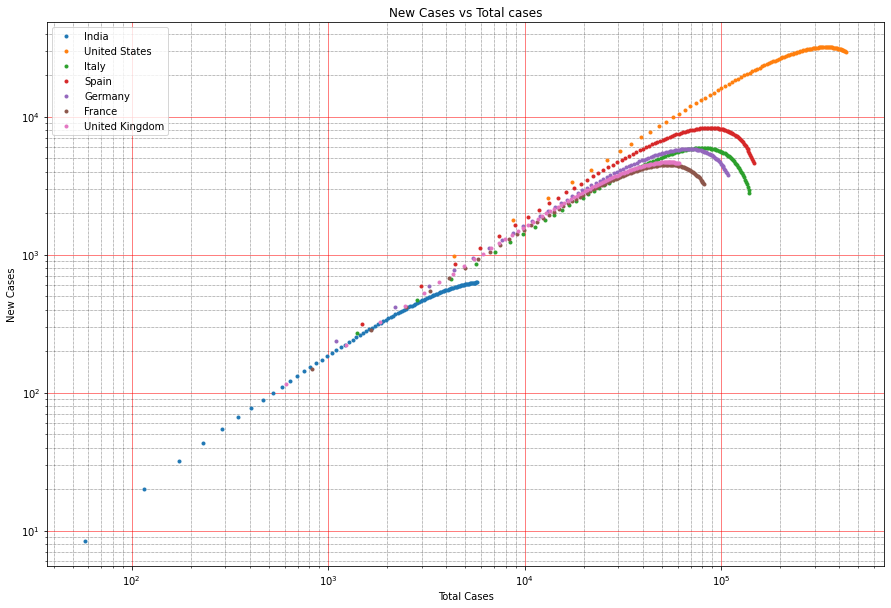

In [3]:
from numpy.polynomial import Polynomial 
plt.figure(figsize=(15,10))
plt.xscale('log')
plt.yscale('log')
for ix, country in enumerate(countries):
  X = df_all[df_all.location==country].total_cases
  Y = df_all[df_all.location==country].new_cases
  p = Polynomial.fit(X, Y, 2)
  plt.plot(*p.linspace(),'.')
  

plt.legend(countries) 

plt.xlabel("Total Cases")
plt.ylabel("New Cases")
plt.title("New Cases vs Total cases");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

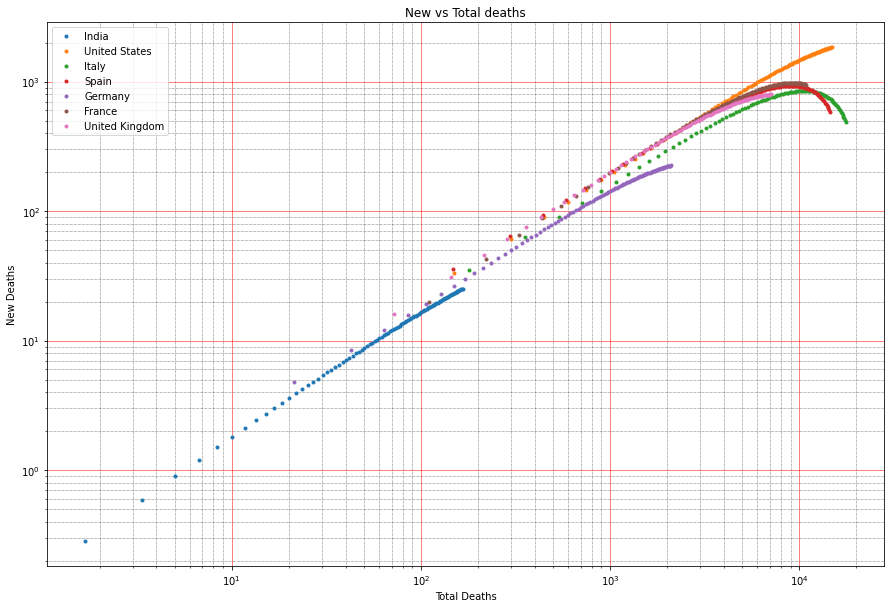

In [4]:
from numpy.polynomial import Polynomial 
plt.figure(figsize=(15,10))
plt.xscale('log')
plt.yscale('log')
for ix, country in enumerate(countries):
  X = df_all[df_all.location==country].total_deaths
  Y = df_all[df_all.location==country].new_deaths
  p = Polynomial.fit(X, Y, 2)
  plt.plot(*p.linspace(),'.')
  
plt.legend(countries) 

plt.xlabel("Total Deaths")
plt.ylabel("New Deaths")
plt.title("New vs Total deaths");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

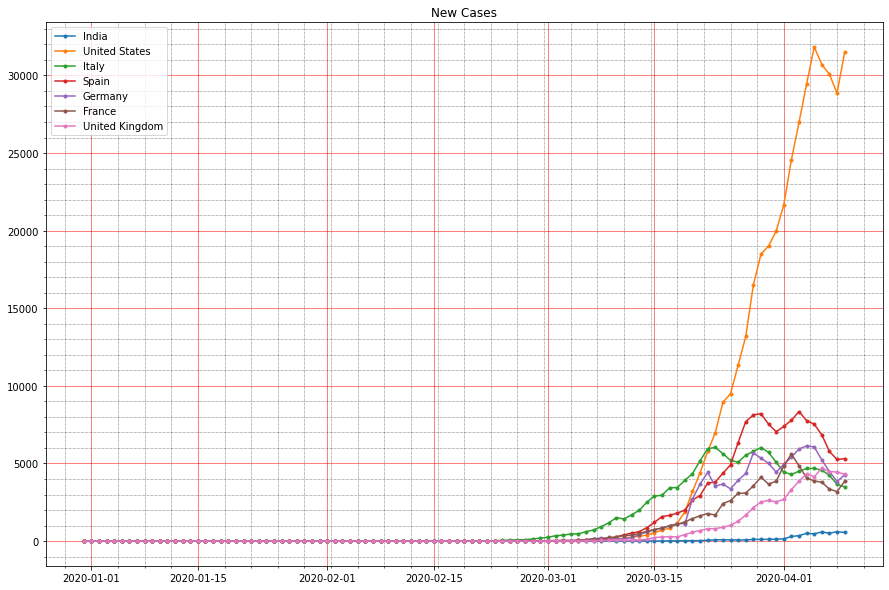

In [5]:
#@title New confirmed cases reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].new_cases.rolling(3,min_periods=1).mean(),'.-')
plt.legend(countries) 
plt.title("New Cases");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

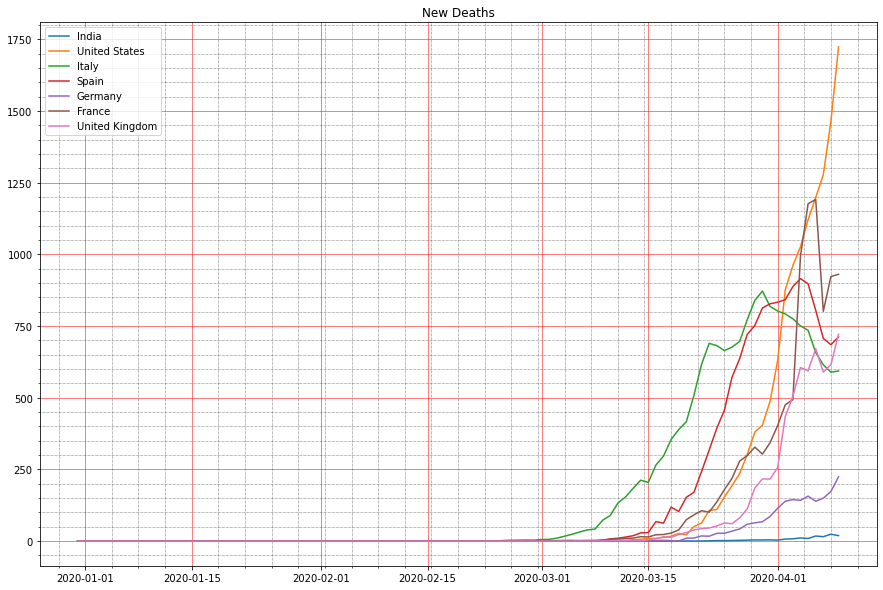

In [6]:
#@title Case fatalities reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date,df_all[df_all.location==country].new_deaths.rolling(3,min_periods=1).mean())
plt.legend(countries) 
plt.title("New Deaths");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

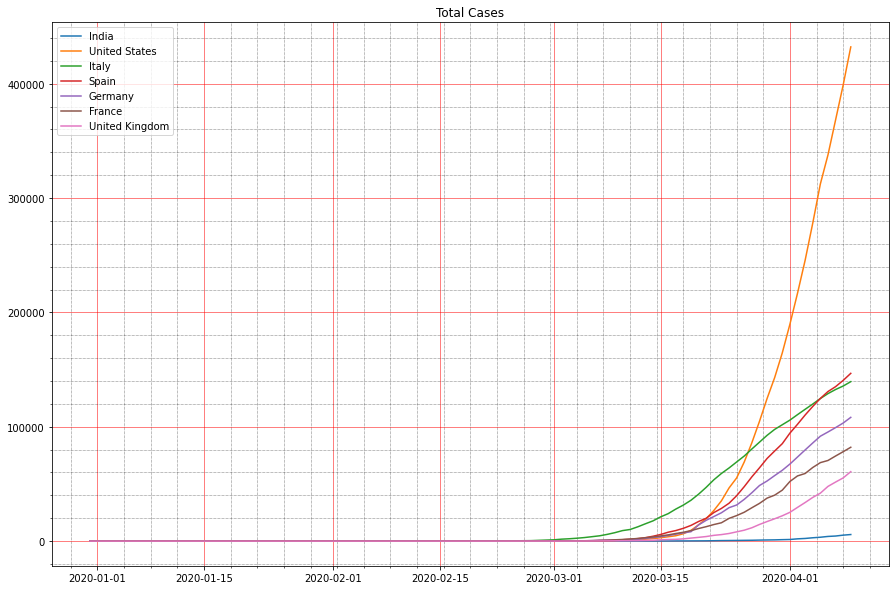

In [7]:
#@title Cumulative confirmed cases reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].total_cases)
plt.legend(countries) 
plt.title("Total Cases");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

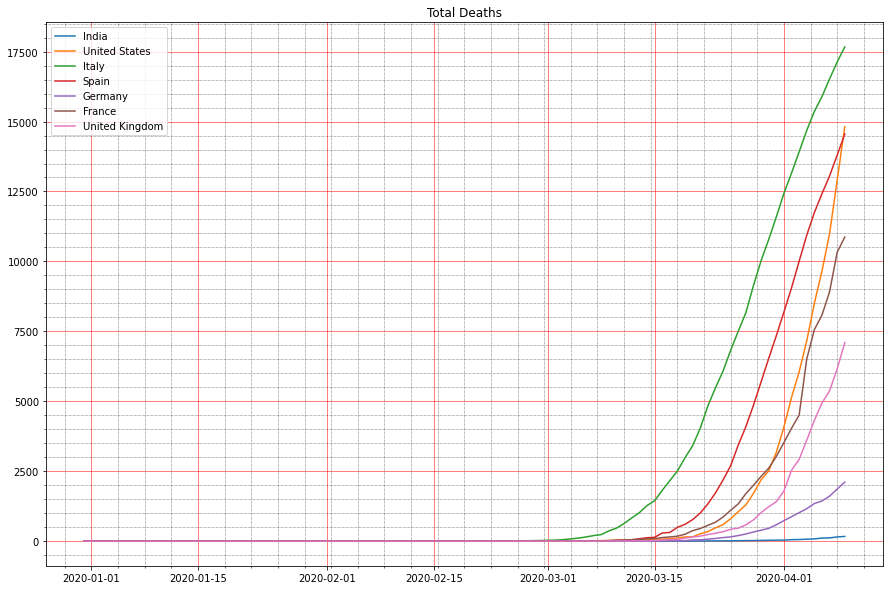

In [8]:
#@title Cumulative case fatalities reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].total_deaths)
plt.legend(countries) 
plt.title("Total Deaths");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

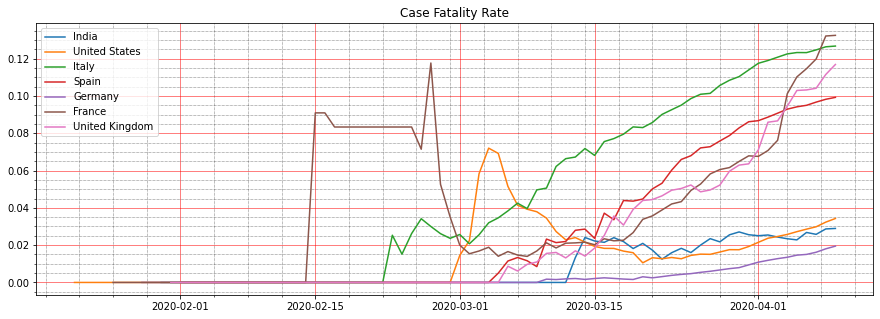

In [9]:
#@title Case Fatality Rate {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
plt.figure(figsize=(15,5))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].total_deaths/df_all[df_all.location==country].total_cases)
plt.legend(countries) 
plt.title("Case Fatality Rate");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

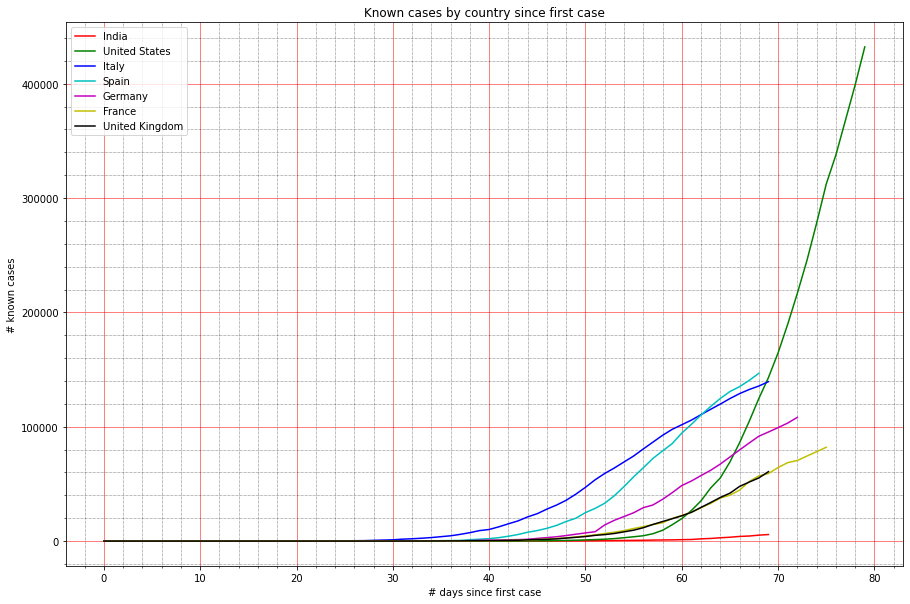

In [10]:
#@title Cumulative cases since first reported case {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
c = 'rgbcmyk'
p = ['-','.-','--','.','*-','o-','_-']
l = []
for i in p:
  for j in list(c):
    l.append(f'{j}{i}')
for idx, ctry in enumerate(countries):
  temp = df_all[df_all.location==ctry].copy()
  temp = temp[temp.total_cases>0].copy()
  plt.plot(
    range(len(temp)),
    temp.total_cases,
    l[idx]
  )
plt.legend(countries);
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# days since first case')
plt.ylabel('# known cases')
plt.title('Known cases by country since first case');
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

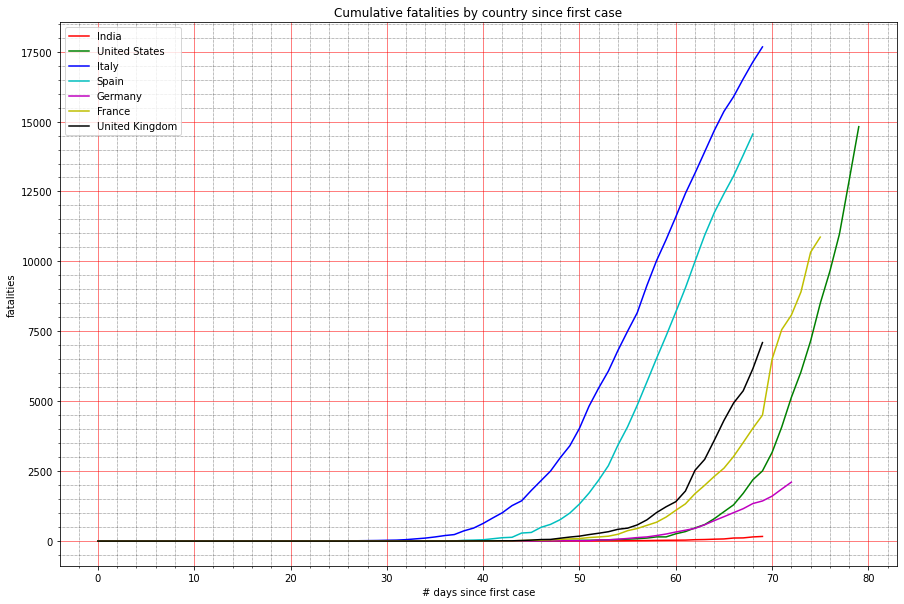

In [11]:
#@title Cumulative fatalities since first reported case {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
c = 'rgbcmyk'
p = ['-','.-','--','.','*-','o-','_-']
l = []
for i in p:
  for j in list(c):
    l.append(f'{j}{i}')
for idx, ctry in enumerate(countries):
  temp = df_all[df_all.location==ctry].copy()
  temp = temp[temp.total_cases>0].copy()
  plt.plot(
    range(len(temp)),
    temp.total_deaths,
    l[idx]
  )
plt.legend(countries);
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# days since first case')
plt.ylabel('fatalities')
plt.title('Cumulative fatalities by country since first case');
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


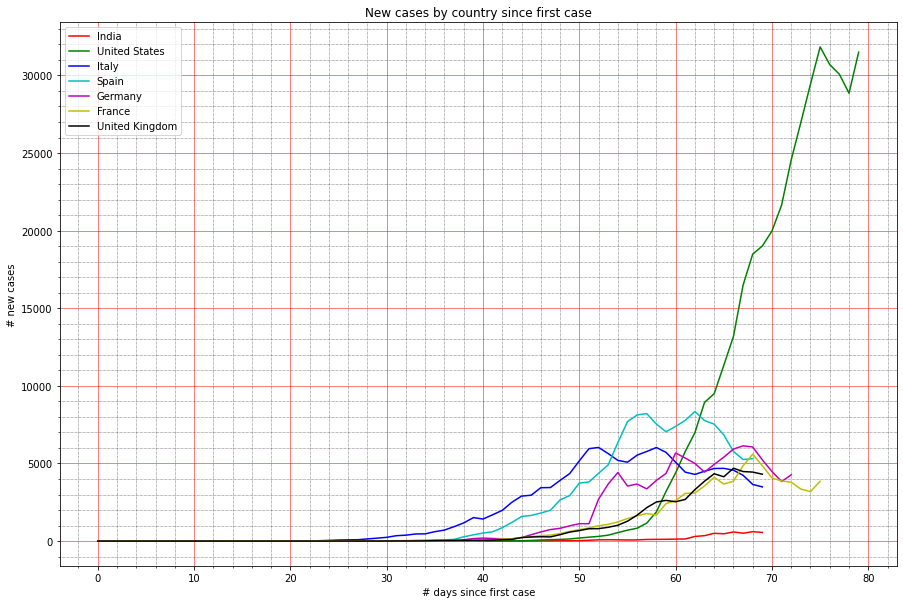

In [12]:
#@title New case trend since first reported case {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
c = 'rgbcmyk'
p = ['-','.-','--','.','*-','o-','_-']
l = []
for i in p:
  for j in list(c):
    l.append(f'{j}{i}')
for idx, ctry in enumerate(countries):
  temp = df_all[df_all.location==ctry].copy()
  temp = temp[temp.total_cases>0].copy()
  plt.plot(
    range(len(temp)),
    temp.new_cases.rolling(3,min_periods=1).mean(),
    l[idx]
  )
plt.legend(countries);
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# days since first case')
plt.ylabel('# new cases')
plt.title('New cases by country since first case');
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [13]:
import ipywidgets as widgets
from scipy.integrate import odeint

def eqs(val,t, r_naught, gamma, nu=0.0):  
	S_t,I_t,R_t,A_t = val
	#r_naught = r_naught - t/1000
	beta = r_naught*gamma
	S = -beta*S_t*I_t + nu*R_t
	I = beta*S_t*I_t-gamma*I_t
	R = gamma*I_t - nu*R_t
	return [S,I,R,I+R]

widgets.interact_manual.opts['manual_name'] = 'Update chart'
@widgets.interact_manual(
    r_naught=widgets.FloatSlider(value=2.2,min=0.8,max=3.5,step=0.01,description='$R_0$'), 
    gamma=widgets.FloatSlider(value=0.3,min=-1.0,max=1.0,step=0.01,description='$\\gamma$'),
    infected_0=widgets.IntSlider(value=-5,min=-7,max=-3,step=-1,description='$I_0={10^n}$; n:'),
    T=widgets.IntSlider(value=90,min=30,max=360,step=30,description='T')
)
def plot(r_naught=2.2, gamma=0.3, infected_0=-5, T=90):
	beta = gamma*r_naught
	step = 1
	start = 0.0
	end = T
	infected_0 = 10**infected_0
	susceptible_0 = 1-infected_0
	recovered_0 = 0.0
	init_val = (susceptible_0, infected_0, recovered_0,infected_0+recovered_0)

	t_range = np.arange(start, end+step, step)
	RES = odeint(eqs,init_val,t_range,(beta, gamma))

	fig = plt.figure(figsize=(15,10))
	plt.plot(RES[:,0],linestyle='--',linewidth=2)
	plt.plot(RES[:,1],linestyle='-',linewidth=3)
	plt.plot(RES[:,2],linestyle='--',linewidth=2)
	plt.plot(RES[:,3],linestyle=':',linewidth=2)
	plt.legend(['Susceptible','Infected','Recovered','Affected'],loc='center left')
	plt.title(f"S-I-R Model\n($R_0$={r_naught:0.2f}, $\\beta$={beta:0.2f}, $\\gamma$={gamma:0.2f})");
	plt.minorticks_on()
	plt.grid(which='major', linestyle='--', linewidth='0.5', color='red')
	plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
	plt.show()

interactive(children=(FloatSlider(value=2.2, description='$R_0$', max=3.5, min=0.8, step=0.01), FloatSlider(va…

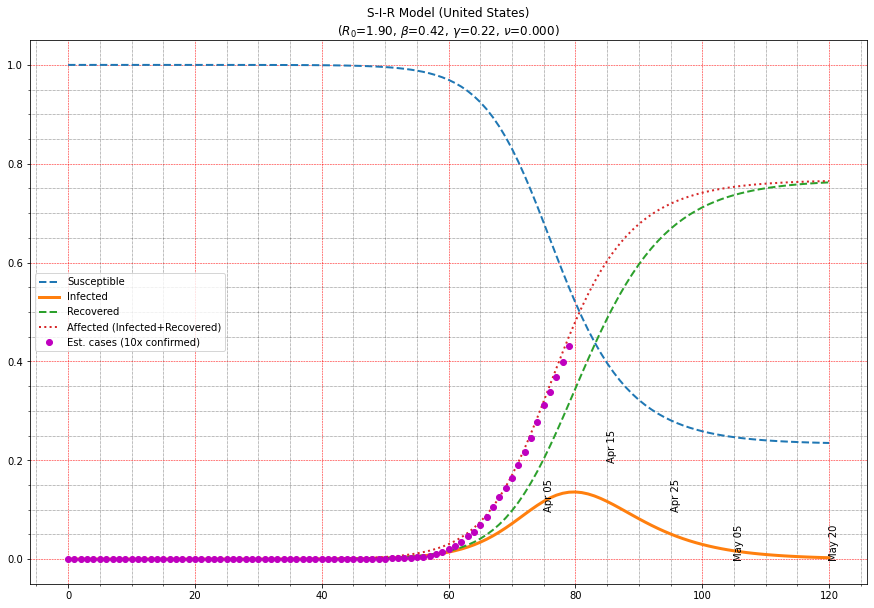

In [14]:
gamma=0.22
r_naught=1.9
nu=0.0
offset= 0
T=120
country = "United States"
beta = gamma*r_naught
step = 1
start = 0.0
end = T
pop = 10_000_000
mult = 10
infected_0 = 1/pop
susceptible_0 = 1-infected_0
recovered_0 = 0.0
init_val = (susceptible_0, infected_0, recovered_0, infected_0+recovered_0)

t_range = np.arange(start, end+step, step)
RES = odeint(eqs,init_val,t_range,(r_naught, gamma, nu))

fig = plt.figure(figsize=(15,10))
plt.plot(range(offset,end+1),RES[offset:,0],linestyle='--',linewidth=2)
plt.plot(range(offset,end+1),RES[offset:,1],linestyle='-',linewidth=3)
plt.plot(range(offset,end+1),RES[offset:,2],linestyle='--',linewidth=2)
plt.plot(range(offset,end+1),RES[offset:,3],linestyle=':',linewidth=2)
est_cases = (df_all[(df_all.location==country)&(df_all.total_cases>0)].total_cases*mult/pop).values[offset:]
plt.plot(range(offset, offset+len(est_cases)),est_cases,'mo',linewidth=4)
plt.legend(['Susceptible','Infected','Recovered','Affected (Infected+Recovered)',f'Est. cases ({mult}x confirmed)'],loc='center left')
plt.title(f"S-I-R Model ({country})\n($R_0$={r_naught:0.2f}, $\\beta$={beta:0.2f}, $\\gamma$={gamma:0.2f}, $\\nu$={nu:0.3f})");
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.text(75,0.1,datetime.strftime(df_all[(df_all.location==country)&(df_all.total_cases>0)].date.min()+timedelta(days=75),"%b %d"),rotation=90);
plt.text(85,0.2,datetime.strftime(df_all[(df_all.location==country)&(df_all.total_cases>0)].date.min()+timedelta(days=85),"%b %d"),rotation=90);
plt.text(95,0.1,datetime.strftime(df_all[(df_all.location==country)&(df_all.total_cases>0)].date.min()+timedelta(days=95),"%b %d"),rotation=90);
plt.text(105,0.0,datetime.strftime(df_all[(df_all.location==country)&(df_all.total_cases>0)].date.min()+timedelta(days=105),"%b %d"),rotation=90);
plt.text(120,0.0,datetime.strftime(df_all[(df_all.location==country)&(df_all.total_cases>0)].date.min()+timedelta(days=120),"%b %d"),rotation=90);